# Testing symmetry and functional form of introducing load at Te change

I will compair the solutions for a load on an elastic thikness ($T_e$) change contact  with three different $T_e$, conditions: a constant $T_e$, a contrast with a higher $T_e$ on the left and a contrast with a higher $T_e$ on the right.

In [2]:
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt

import time
#import pylab as plt
from IPython import display

%load_ext autoreload
%autoreload 1
%aimport flexureCodeForTeChange

In [1]:
D_1 = 4.6e22 #flexural regidity (N meters), weak plate
D_2 = 3.7e23 #flexural regidity (N meters), strong plate

#density of sediment
rho_s = 3000 #kg/m3
rho_w = 1000 #kg/m3
rho_m = 3300 #kg/m3
g = 9.8 #ms-2
h_s = 2000 #meters, load thickness
a_1 = (4*D_1/( g * (rho_m - rho_w)))**0.25 #flexural parameter alpha
a_2 = (4*D_2/( g * (rho_m - rho_w)))**0.25

n_halfWidth = 400000

contact_load = [8.8e12]
load_points = [n_halfWidth]

In [4]:
V_0 = contact_load[0]

constant_rdg_low = flexureCodeForTeChange.Plate_Flexure_MN(a_1, a_1, D_1, D_1, contact_load, load_points, n_halfWidth=n_halfWidth)
x_margin_low = 3*np.pi/4*a_1
x_forebulge_low = np.pi*a_1
w_0_low = V_0*a_1**3/(8*D_1)

constant_rdg_high = flexureCodeForTeChange.Plate_Flexure_MN(a_2, a_2, D_2, D_2, contact_load, load_points, n_halfWidth=n_halfWidth)
x_margin_high = 3*np.pi/4*a_2
x_forebulge_high = np.pi*a_2
w_0_high = V_0*a_2**3/(8*D_2)

high_left = flexureCodeForTeChange.Plate_Flexure_MN(a_2, a_1, D_2, D_1, contact_load, load_points, n_halfWidth=n_halfWidth)

high_right = flexureCodeForTeChange.Plate_Flexure_MN(a_1, a_2, D_1, D_2, contact_load, load_points, n_halfWidth=n_halfWidth)

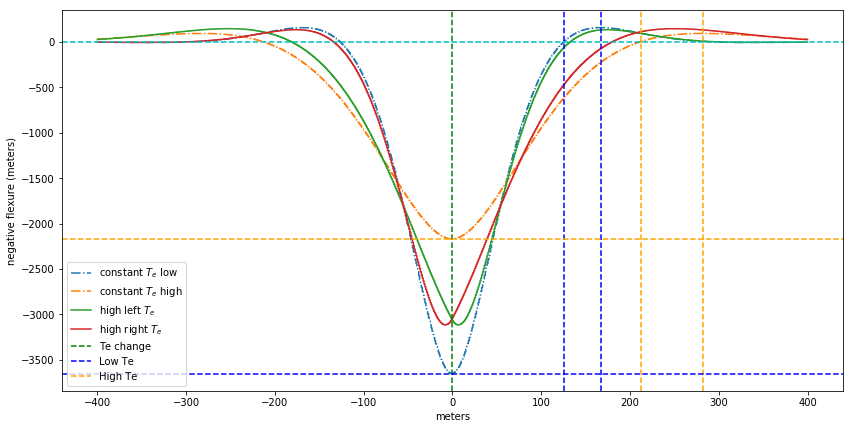

In [5]:
plt.figure(figsize=(14,7))
plt.plot(constant_rdg_low[0]/1000, constant_rdg_low[1], label="constant $T_e$ low", linestyle="-.")
plt.plot(constant_rdg_high[0]/1000, constant_rdg_high[1], label="constant $T_e$ high", linestyle="-.")
plt.plot(high_left[0]/1000, high_left[1], label="high left $T_e$")
plt.plot(high_right[0]/1000, high_right[1], label="high right $T_e$")

plt.axvline(x=0, linestyle="--", c='g', label="Te change")
plt.axvline(x=x_margin_low/1000, linestyle="--", c='b', label="Low Te")
plt.axvline(x=x_margin_high/1000, linestyle="--", c='orange', label="High Te")
plt.axvline(x=x_forebulge_low/1000, linestyle="--", c='b')
plt.axvline(x=x_forebulge_high/1000, linestyle="--", c='orange')

plt.axhline(-w_0_low, linestyle="--", c='b')
plt.axhline(-w_0_high, linestyle="--", c='orange')


plt.axhline(y=0, linestyle="--", c='c')

plt.xlabel("meters")
plt.ylabel("negative flexure (meters)")
plt.legend()

plt.show()

In [ ]:
### PAPER FIGURE

plt.figure(figsize=(14,7))
plt.plot(constant_rdg_high[0]/1000, constant_rdg_high[1], label="High $T_e$ flexural profile (Initial geometry)")
plt.plot(constant_rdg_low[0]/1000, constant_rdg_low[1], label="Low $T_e$ flexural profile (Final geometry)")

plt.axvline(x=0, linestyle="--", c='g', label="Applied point load")

plt.axvline(x=x_forebulge_low/1000., c='b', linestyle=":", label="(1) High $T_e$ forebulge")
plt.axvline(x=x_BM_high/1000., c='orange', linestyle="-.", label="(2) High $T_e$ basin margin")
plt.axvline(x=x_forebulge_high/1000., c='orange', linestyle=":", label="(3) Low $T_e$ forebulge")
plt.axvline(x=x_BM_low/1000., c='b', linestyle="-.", label="(4) Low $T_e$ basin margin")
plt.axvline(x=x_StressChange_low/1000., c='r', linestyle="-.", label="(5) Basin curvature = 0")

plt.xlim(-100,400)
plt.axhline(y=0, linestyle="--", c='c', label="Horizontal datum")

plt.xlabel("Distance from point load [km]")
plt.ylabel("Slab profile [m]")
plt.title("Reference points applied to understand forebugle gyration")
plt.legend()

plt.show()

## Comparison against online example for line load with infinite plate
http://geofaculty.uwyo.edu/heller/Short%20Course/Basins%205%20Flexure.pdf

In [ ]:
D_1 = 1.6e23 #flexural regidity (N meters), weak plate
a_1 = 95.5e3
V_0 = [8*D_1*6000/a_1**3]

constant_rdg_low = Plate_Flexure_MN(a_1, a_1, D_1, D_1, V_0, load_points, n_halfWidth)
x_margin_low = 3*np.pi/4*a_1
x_forebulge_low = np.pi*a_1
w_0_low = V_0[0]*a_1**3/(8*D_1)

plt.plot(constant_rdg_low[0]/1000, constant_rdg_low[1], label="constant $T_e$ low", linestyle="-.")

plt.axvline(x=0, linestyle="--", c='g', label="Te change")
plt.axvline(x=x_margin_low/1000, linestyle="--", c='b', label="Low Te")
plt.axvline(x=x_forebulge_low/1000, linestyle="--", c='b')

plt.axhline(-w_0_low, linestyle="--", c='b')

plt.axhline(y=0, linestyle="--", c='c')

## Multiple loads

In [6]:
D_1 = 4.6e22 #flexural regidity (N meters), weak plate
D_2 = 3.7e23 #flexural regidity (N meters), strong plate

#density of sediment
rho_s = 3000 #kg/m3
rho_w = 1000 #kg/m3
rho_m = 3300 #kg/m3 
g = 9.8 #ms-2
h_s = 2000 #meters, load thickness
a_1 = (4*D_1/( g * (rho_m - rho_w)))**0.25 #flexural parameter alpha
a_2 = (4*D_2/( g * (rho_m - rho_w)))**0.25

contact_load = np.array( [4.4e12, 4.4e12] )
load_points = np.array( [200000, 400000] )

In [7]:
V_0 = contact_load[0]

constant_rdg_low = flexureCodeForTeChange.Plate_Flexure_MN(a_1, a_1, D_1, D_1, contact_load, load_points, n_halfWidth)
x_margin_low = 3*np.pi/4*a_1
x_forebulge_low = np.pi*a_1
w_0_low = V_0*a_1**3/(8*D_1)

constant_rdg_high = flexureCodeForTeChange.Plate_Flexure_MN(a_2, a_2, D_2, D_2, contact_load, load_points, n_halfWidth)
x_margin_high = 3*np.pi/4*a_2
x_forebulge_high = np.pi*a_2
w_0_high = V_0*a_2**3/(8*D_2)

high_left = flexureCodeForTeChange.Plate_Flexure_MN(a_2, a_1, D_2, D_1, contact_load, load_points, n_halfWidth)

high_right = flexureCodeForTeChange.Plate_Flexure_MN(a_1, a_2, D_1, D_2, contact_load, load_points, n_halfWidth)

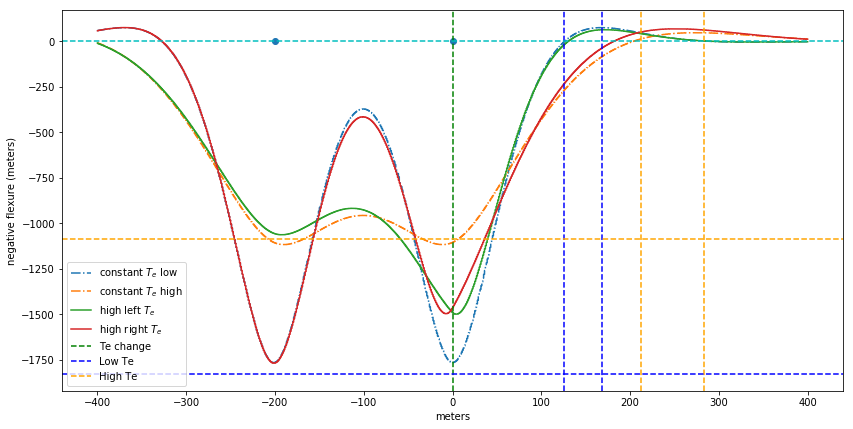

In [8]:
plt.figure(figsize=(14,7))
plt.plot(constant_rdg_low[0]/1000, constant_rdg_low[1], label="constant $T_e$ low", linestyle="-.")
plt.plot(constant_rdg_high[0]/1000, constant_rdg_high[1], label="constant $T_e$ high", linestyle="-.")
plt.plot(high_left[0]/1000, high_left[1], label="high left $T_e$")
plt.plot(high_right[0]/1000, high_right[1], label="high right $T_e$")

plt.axvline(x=0, linestyle="--", c='g', label="Te change")
plt.axvline(x=x_margin_low/1000, linestyle="--", c='b', label="Low Te")
plt.axvline(x=x_margin_high/1000, linestyle="--", c='orange', label="High Te")
plt.axvline(x=x_forebulge_low/1000, linestyle="--", c='b')
plt.axvline(x=x_forebulge_high/1000, linestyle="--", c='orange')

plt.axhline(-w_0_low, linestyle="--", c='b')
plt.axhline(-w_0_high, linestyle="--", c='orange')

plt.scatter((load_points-n_halfWidth)/1000, (load_points*0))


plt.axhline(y=0, linestyle="--", c='c')

plt.xlabel("meters")
plt.ylabel("negative flexure (meters)")
plt.legend()

plt.show()